In [1]:
import tensorflow as tf

tf.__version__

'2.2.0-rc4'

In [2]:
import pandas as pd
import numpy as np

<hr>

## Load data

<hr>

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

print(f"X_train shape : {X_train.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"X_test shape : {X_test.shape}")
print(f"y_test shape : {y_test.shape}")

X_train shape : (50000, 32, 32, 3)
y_train shape : (50000, 1)
X_test shape : (10000, 32, 32, 3)
y_test shape : (10000, 1)


In [4]:
# Preprocessing input to make gradient descent easier

X_train = X_train/255
X_test = X_test/255

In [5]:
print(f"Input shape : {X_train[0].shape}")

Input shape : (32, 32, 3)


<hr>

## Build the model

<hr>

##### In case of many conolution, pooling layers use same padding mode that retains the shape of image.

##### That helps to not shrink image further.

In [6]:
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.models import Model

input_shape = X_train[0].shape
filters = [32, 64, 128]
filter_size = (3,3)
pooling_size = (2,2)


i = Input(shape=(input_shape))

# Convolution layer... Performing pooling convolution other than striding convolution.
# Batch Normalization works better with conv + pooling rather than strided convolution
x = Conv2D(filters=filters[0], kernel_size=filter_size, activation="relu", padding="same")(i)
x = BatchNormalization()(x)
x = Conv2D(filters=filters[0], kernel_size=filter_size, activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=pooling_size)(x)

## Second round with increased filters
x = Conv2D(filters=filters[1], kernel_size=filter_size, activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(filters=filters[1], kernel_size=filter_size, activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=pooling_size)(x)

## Third round of double convolution
x = Conv2D(filters=filters[2], kernel_size=filter_size, activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(filters=filters[2], kernel_size=filter_size, activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=pooling_size)(x)

## Stage 2: Fully connected layers
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.2)(x)
# Output layer contains number of classes
x = Dense(len(set(y_train.flatten())), activation="softmax")(x)

model = Model(i,x)

In [7]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 195s 125ms/step - loss: 1.2558 - accuracy: 0.5700 - val_loss: 1.5667 - val_accuracy: 0.4819
Epoch 2/10
1563/1563 [==============================] - 207s 133ms/step - loss: 0.8086 - accuracy: 0.7211 - val_loss: 0.7888 - val_accuracy: 0.7304
Epoch 3/10
1563/1563 [==============================] - 214s 137ms/step - loss: 0.6485 - accuracy: 0.7762 - val_loss: 0.6595 - val_accuracy: 0.7776
Epoch 4/10
1563/1563 [==============================] - 215s 138ms/step - loss: 0.5337 - accuracy: 0.8180 - val_loss: 0.6398 - val_accuracy: 0.7848
Epoch 5/10
1563/1563 [==============================] - 219s 140ms/step - loss: 0.4324 - accuracy: 0.8510 - val_loss: 0.6498 - val_accuracy: 0.7956
Epoch 6/10
1563/1563 [==============================] - 220s 141ms/step - loss: 0.3452 - accuracy: 0.8809 - val_loss: 0.6826 - val_accuracy: 0.7938
Epoch 7/10
1563/1563 [==============================] - 222s 142ms/step - loss: 0.2717 - accuracy: 0.9061 - val_

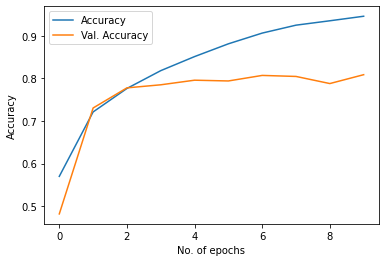

In [8]:
import matplotlib.pyplot as plt

plt.plot(r.history["accuracy"], label="Accuracy")
plt.plot(r.history["val_accuracy"], label="Val. Accuracy")
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy")
plt.legend()

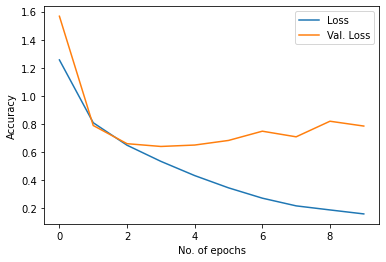

In [9]:
import matplotlib.pyplot as plt

plt.plot(r.history["loss"], label="Loss")
plt.plot(r.history["val_loss"], label="Val. Loss")
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy")
plt.legend()

In [11]:
# Performing Data Augmentation

batch_size = 32
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train_gen = data_gen.flow(X_train, y_train, batch_size= batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

new_r = model.fit(train_gen, validation_data=(X_test, y_test), epochs=10, steps_per_epoch=steps_per_epoch)

Epoch 1/10
1562/1562 [==============================] - 201s 129ms/step - loss: 0.6165 - accuracy: 0.7979 - val_loss: 0.7829 - val_accuracy: 0.7717
Epoch 2/10
1562/1562 [==============================] - 225s 144ms/step - loss: 0.5207 - accuracy: 0.8249 - val_loss: 0.5346 - val_accuracy: 0.8278
Epoch 3/10
1562/1562 [==============================] - 221s 142ms/step - loss: 0.4751 - accuracy: 0.8383 - val_loss: 0.6186 - val_accuracy: 0.8098
Epoch 4/10
1562/1562 [==============================] - 222s 142ms/step - loss: 0.4474 - accuracy: 0.8483 - val_loss: 0.5408 - val_accuracy: 0.8218
Epoch 5/10
1562/1562 [==============================] - 222s 142ms/step - loss: 0.4245 - accuracy: 0.8566 - val_loss: 0.5742 - val_accuracy: 0.8185
Epoch 6/10
1562/1562 [==============================] - 222s 142ms/step - loss: 0.3925 - accuracy: 0.8659 - val_loss: 0.5279 - val_accuracy: 0.8280
Epoch 7/10
1562/1562 [==============================] - 223s 143ms/step - loss: 0.3786 - accuracy: 0.8699 - val_

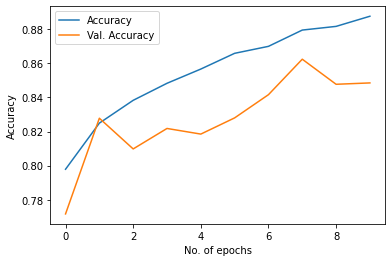

In [12]:
import matplotlib.pyplot as plt

plt.plot(new_r.history["accuracy"], label="Accuracy")
plt.plot(new_r.history["val_accuracy"], label="Val. Accuracy")
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy")
plt.legend()

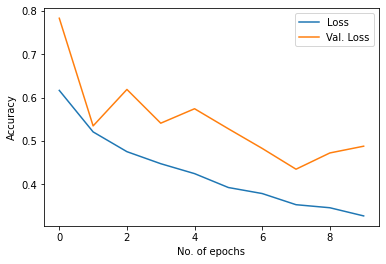

In [13]:
import matplotlib.pyplot as plt

plt.plot(new_r.history["loss"], label="Loss")
plt.plot(new_r.history["val_loss"], label="Val. Loss")
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy")
plt.legend()